# Exploratory data analysis

In this notebook we will explore and visualize trends, patterns and distributions in the cleaned OMDb dataset.

* more to be there *

## 1. Setup and Data Overview


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

base_dir = os.getcwd()
data_path = os.path.join(base_dir, "..", "data_collection", "OMDb", "omdb_cleaned.csv")

df = pd.read_csv(data_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       988 non-null    object 
 1   Year        988 non-null    int64  
 2   Genre       988 non-null    object 
 3   Director    988 non-null    object 
 4   Actors      981 non-null    object 
 5   Language    974 non-null    object 
 6   Country     988 non-null    object 
 7   Runtime     987 non-null    object 
 8   BoxOffice   780 non-null    float64
 9   imdbRating  980 non-null    float64
 10  imdbVotes   980 non-null    float64
 11  Awards      978 non-null    object 
 12  Type        988 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 100.5+ KB


feauture description + types

## 2. Missing Values

text

### 2.1 Missing values heatmap

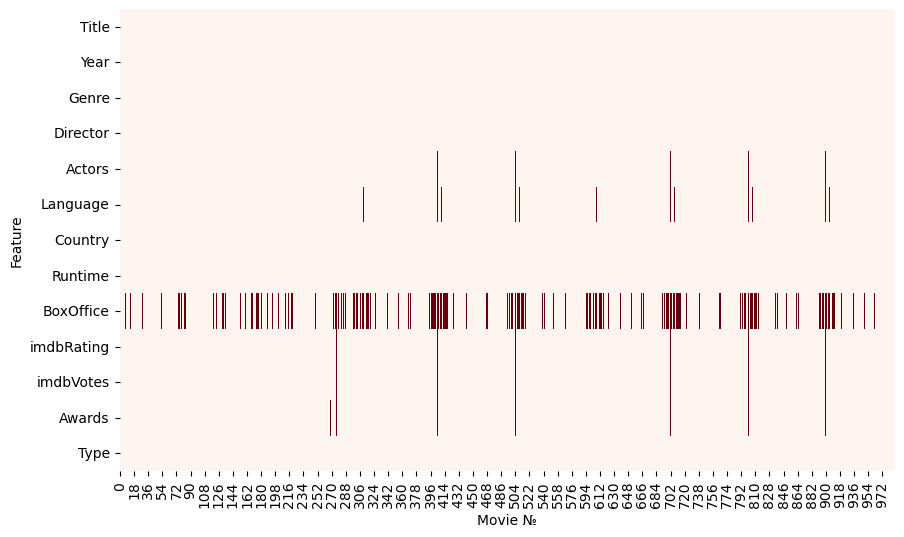

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().T, cbar=False, cmap="Reds", yticklabels=True)

plt.xlabel("Movie №")
plt.ylabel("Feature")
plt.show()

### 2.2 Missing values table

In [42]:
missing_summary = df.isna().sum().reset_index()
missing_summary.columns = ['Feature', 'Missing Count']
missing_summary["% Missing"] = (missing_summary["Missing Count"] / len(df)) * 100
missing_summary = missing_summary[missing_summary["Missing Count"] > 0]
missing_summary.sort_values(by="Missing Count", ascending=False)

,Feature,Missing Count,% Missing
8,BoxOffice,208,21.052632
5,Language,14,1.417004
11,Awards,10,1.012146
9,imdbRating,8,0.809717
10,imdbVotes,8,0.809717
4,Actors,7,0.708502
7,Runtime,1,0.101215


### 2.3 The Boxplot: IMDb rating vs missing box of

Here we want to briefly find out whether the absence of box office data is related to movie popularity. We compared IMDb ratings for movies with and without BoxOffice values.

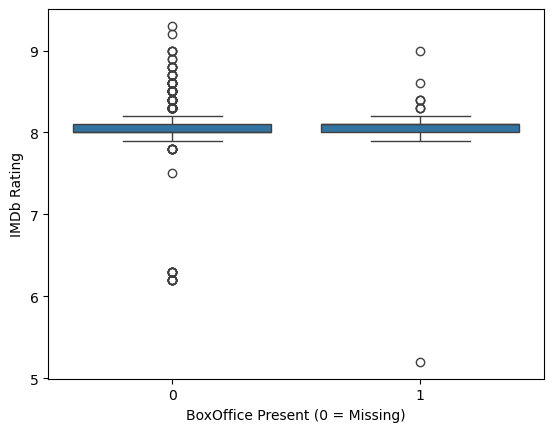

In [43]:
df["missing_boxoffice"] = df["BoxOffice"].isna().astype(int)

sns.boxplot(x="missing_boxoffice", y="imdbRating", data=df)
plt.xlabel("BoxOffice Present (0 = Missing)")
plt.ylabel("IMDb Rating")
plt.show()

There is no significant difference between the two groups which suggests that missing Box Office fields are not strongly biased by rating.

## 3. Feature Exploration





### 3.1 Ratings & Votes

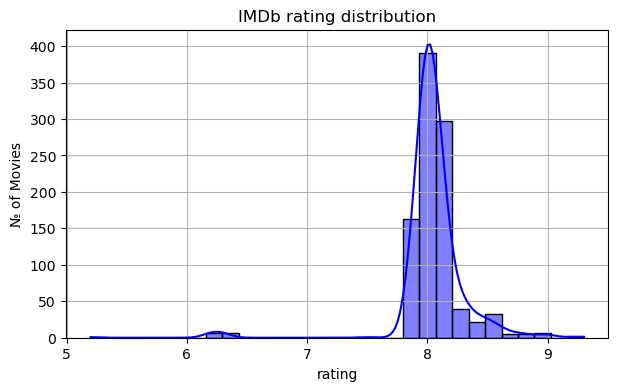

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(df["imdbRating"].dropna(), bins=30, kde=True, color="blue")
plt.title("IMDb rating distribution")
plt.xlabel("rating")
plt.ylabel("№ of Movies")
plt.grid(True)
plt.show()

### 3.2 Runtime Distribution

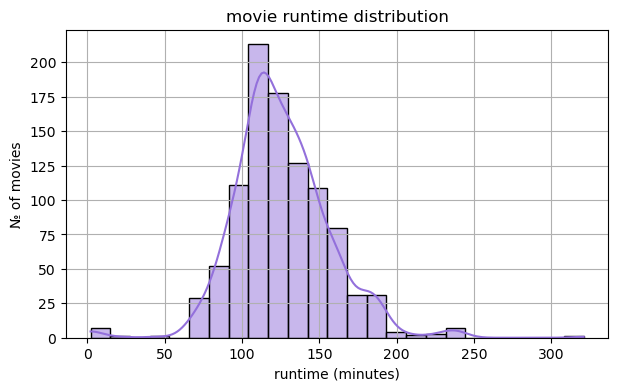

In [49]:
#convert string "runtime" to float type
df["Runtime_clean"] = df["Runtime"].str.extract(r'(\d+)').astype(float)
plt.figure(figsize=(7, 4))
sns.histplot(df["Runtime_clean"].dropna(), bins=25, kde=True, color="mediumpurple")
plt.title("movie runtime distribution")
plt.xlabel("runtime (minutes)")
plt.ylabel("№ of movies")
plt.grid(True)
plt.show()

### 3.3 Genre Frequency

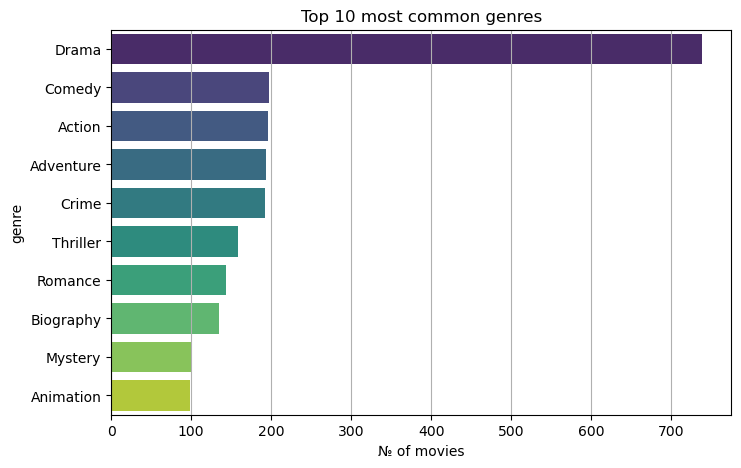

In [62]:
# to count how often each genre appears in the list
from collections import Counter

all_genres = []

for genre_string in df["Genre"].dropna():
    split_genres = genre_string.split(", ")
    all_genres.extend(split_genres)

from collections import Counter
genre_counts = pd.DataFrame(Counter(all_genres).most_common(10), columns=["Genre", "Count"])

plt.figure(figsize=(8, 5))
sns.barplot(data=genre_counts, y="Genre", x="Count", hue="Genre", palette="viridis", dodge=False, legend=False)
plt.title("Top 10 most common genres")
plt.xlabel("№ of movies")
plt.ylabel("genre")
plt.grid(True, axis='x')
plt.show()

### 3.4 Country / Language

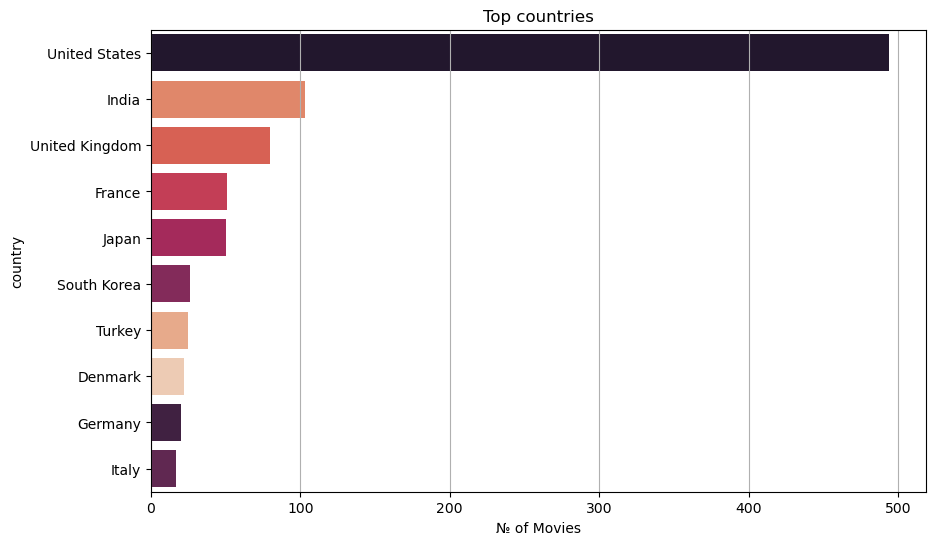

In [85]:
df["Main_Country"] = df["Country"].dropna().apply(lambda x: x.split(",")[0])

plt.figure(figsize=(10, 6))
order = df["Main_Country"].value_counts().head(10).index

sns.countplot(
    data=df[df["Main_Country"].isin(order)],
    y="Main_Country",
    order=order,
    hue="Main_Country",         # ✅ this assigns color by category
    palette="rocket",
    dodge=False,
    legend=False                # ✅ avoids duplicate legend
)

plt.title("Top сountries")
plt.xlabel("№ of Movies")
plt.ylabel("сountry")
plt.grid(True, axis='x')
plt.show()

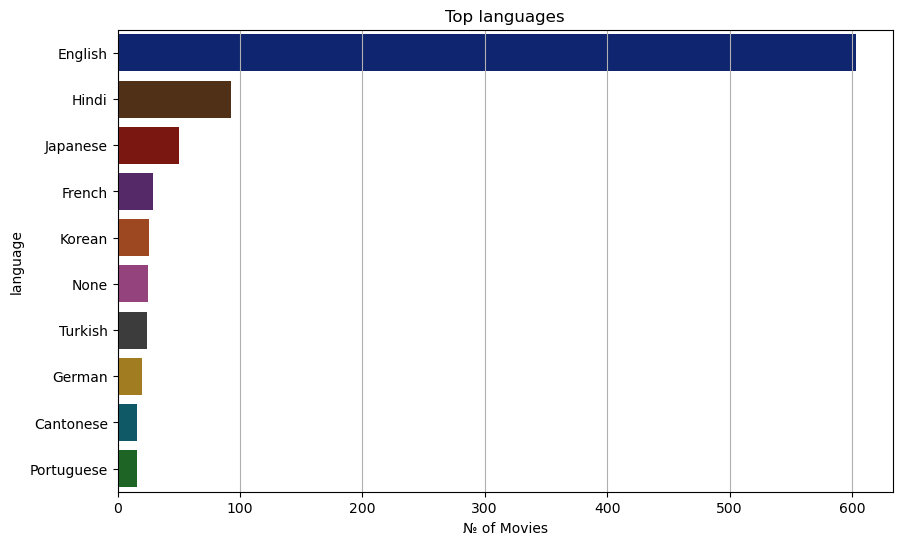

In [86]:
df["Main_Language"] = df["Language"].dropna().apply(lambda x: x.split(",")[0])

# top 10 most frequent
top_languages = df["Main_Language"].value_counts().head(10).index

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df[df["Main_Language"].isin(top_languages)],
    y="Main_Language",
    order=top_languages,
    hue="Main_Language",        
    palette="dark",         
    dodge=False,
    legend=False
)

plt.title("Top languages")
plt.xlabel("№ of Movies")
plt.ylabel("language")
plt.grid(True, axis='x')
plt.show()

## 4. sxss

## 5. sxss

## 6. sxss

## 7. sxss